**Herramientas**: matplotlib, numpy, imageio

1. Crear una figura 2D con puntos o formas.

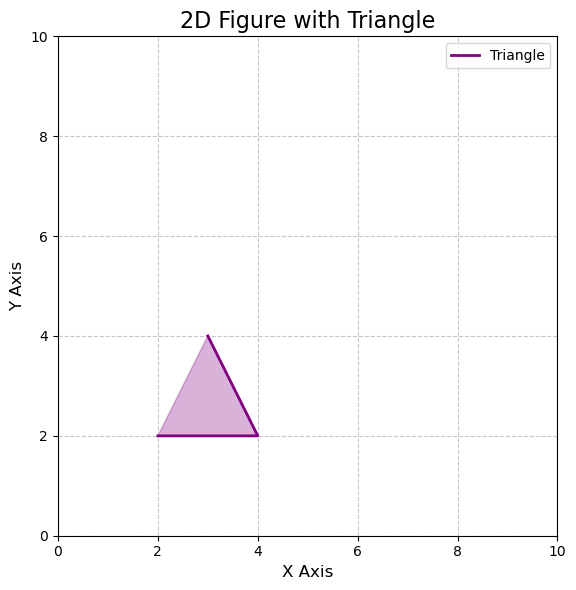

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Add a triangle
triangle_x = [2, 4, 3]
triangle_y = [2, 2, 4]
ax.plot(triangle_x, triangle_y, color='purple', linewidth=2, label='Triangle')
ax.fill(triangle_x, triangle_y, color='purple', alpha=0.3)

# Set equal aspect ratio
ax.set_aspect('equal')

# Add title and labels
ax.set_title('2D Figure with Triangle', fontsize=16)
ax.set_xlabel('X Axis', fontsize=12)
ax.set_ylabel('Y Axis', fontsize=12)

# Set limits
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

2. Aplicar traslación, rotación y escala usando matrices de transformación.

In [12]:
def traslacion(dx, dy):
    return np.array([[1, 0, dx],
                     [0, 1, dy],
                     [0, 0, 1]])
def rotacion(theta):
    rad = np.radians(theta)
    return np.array([[np.cos(rad), -np.sin(rad), 0],
                     [np.sin(rad),  np.cos(rad), 0],
                     [0, 0, 1]])
def escala(sx, sy):
    return np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]])

3. Generar una animación (usando bucles o interpolación).
4. Animar la transformación en función del tiempo (t) o del frame.
5. Exportar como GIF animado con imageio.

In [19]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import imageio
import os
from IPython.display import Image, display

# Convertir a coordenadas homogéneas
points = np.vstack([triangle_x, triangle_y, np.ones(len(triangle_x))])

# Función para aplicar una transformación a los puntos
def apply_transform(points, transform_matrix):
    return np.dot(transform_matrix, points)

# Función para extraer las coordenadas x e y de las coordenadas homogéneas
def get_xy(homogeneous_points):
    return homogeneous_points[0, :], homogeneous_points[1, :]

# Función para crear un frame de la animación
def create_frame(frame_num, total_frames):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Factor de progreso (0 a 1)
    t = frame_num / total_frames
    
    # Aplicar varias transformaciones en secuencia basadas en el tiempo
    
    # Primero rotación alrededor del origen
    angle = 360 * t
    rot_matrix = rotacion(angle)
    
    # Luego escala pulsante
    scale_factor = 1 + 0.5 * np.sin(2 * np.pi * t)
    scale_matrix = escala(scale_factor, scale_factor)
    
    # Finalmente traslación en círculo
    tx = 1 + 0.5 * np.cos(2 * np.pi * t)
    ty = 1 + 0.5 * np.sin(2 * np.pi * t)
    trans_matrix = traslacion(tx, ty)
    
    # Combinar todas las transformaciones (multiplicar matrices)
    transform = np.dot(trans_matrix, np.dot(scale_matrix, rot_matrix))
    
    # Aplicar la transformación a los puntos del triángulo
    transformed_points = apply_transform(points, transform)
    transformed_x, transformed_y = get_xy(transformed_points)
    
    # Dibujar el triángulo transformado
    ax.plot(transformed_x, transformed_y, color='purple', linewidth=2)
    ax.fill(transformed_x, transformed_y, color='purple', alpha=0.3)
    
    # Configurar los límites y aspecto del gráfico
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.set_title(f'Frame {frame_num}: Transformación del Triángulo', fontsize=12)
    # mostrar ejes
    ax.axhline(0, color='black',linewidth=0.5, ls='-')
    ax.axvline(0, color='black',linewidth=0.5, ls='-')

    # Guardar la figura como una imagen
    filename = f'frame_{frame_num:03d}.png'
    plt.savefig(filename)
    plt.close(fig)
    return filename

# Crear directorio temporal para los frames si no existe
frames_dir = 'temp_frames'
if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

# Crear frames
num_frames = 60
filenames = []
for i in range(num_frames):
    filename = create_frame(i, num_frames - 1)
    filenames.append(filename)

# Crear el GIF animado
gif_path = 'triangle_animation.gif'
with imageio.get_writer(gif_path, mode='I', duration=0.1, loop =0) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Limpiar archivos temporales
for filename in filenames:
    os.remove(filename)

# Mostrar el GIF
# display(Image(filename=gif_path))
print(f"GIF animado guardado como: {gif_path}")

C:\Users\jgira\AppData\Local\Temp\ipykernel_11128\590430903.py:84: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF animado guardado como: triangle_animation.gif


![gif del triangulo](triangle_animation.gif)